# Desafío N° 2 
## 2 - Trabajo con Subconjunto Departamentos de la base de Properati limpia

### Grupo N° 5

    Integrantes:
                Arangue, Marcelo            
                Bardauil, Joaquín              
                Marquez, Hector              
                Neustadt, Alejandro       
                Pero, Felipe                                    


In [1]:
# Bajamos las nuevas bases
#Importamos las librerías que usaremos durante la limpieza:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy.stats as sts
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.io import output_notebook, show

In [2]:
# Chequeo de base 
df_dpto = pd.read_csv("prop_apartament.csv")

In [3]:
df_dpto.shape

(53250, 21)

In [4]:
df_dpto.isnull().sum().sort_values()

Unnamed: 0                   0
barrio                       0
ciudad                       0
lon                          0
lat                          0
lat-lon                      0
geonames_id                  0
state_name                   0
lugar                        0
price_usd_per_m2_cov         0
price_aprox_usd              0
surface_covered_in_m2        0
surface_total_in_m2          0
description                  0
title                        0
property_type                0
price_usd_per_m2_tot         0
rooms                    12522
floor                    39780
expenses                 42920
cc_barrio_c              51315
dtype: int64

In [5]:
# Si no tengo valor de rooms y floor por defecto es 1, expenses 50 usd y cc_barrio_c 0.
# Luego al correr la base, no observe que mejoren los indicadores, con lo que dejo esta asignacion pendiente
# por si hace falta poner nuevamente mas adelante
#rooms_1 = df_dpto.rooms.isnull()
#df_dpto.rooms[rooms_1] = 1
#floor_1 = df_dpto.floor.isnull()
#df_dpto.floor[floor_1] = 1
#expe_1 = df_dpto.expenses.isnull()
#df_dpto.expenses[expe_1] = 50
#barrio_1 = df_dpto.cc_barrio_c.isnull()
#df_dpto.cc_barrio_c[barrio_1] = 0

In [6]:
#df_dpto.isnull().sum().sort_values()

In [7]:
df_dpto.property_type.unique()

array(['apartment'], dtype=object)

In [8]:
df_dpto.price_usd_per_m2_cov.describe()

count    53250.000000
mean      2892.328802
std       3142.251522
min          1.000000
25%       1800.000000
50%       2333.333333
75%       3052.631579
max      56000.000000
Name: price_usd_per_m2_cov, dtype: float64

In [9]:
# Eliminamos valores extremos bajos que consideramos fuera de rangos para este caso tomamos 1000 como ejemplo
muy_bajos = df_dpto.price_usd_per_m2_cov < 1000
muy_bajos.value_counts()

False    51875
True      1375
Name: price_usd_per_m2_cov, dtype: int64

In [10]:
df_dpto.drop(df_dpto[muy_bajos].index, inplace=True)

In [11]:
# Eliminamos valores extremos altos que consideramos fuera de rangos para este caso tomamos 10000 como ejemplo
muy_altos = df_dpto.price_usd_per_m2_cov > 10000
muy_altos.value_counts()

False    50872
True      1003
Name: price_usd_per_m2_cov, dtype: int64

In [12]:
df_dpto.drop(df_dpto[muy_altos].index, inplace=True)

In [13]:
# Eliminamos valores extremos altos que consideramos fuera de rangos para este caso tomamos 700 como ejemplo
muy_altos = df_dpto.surface_covered_in_m2 > 700
muy_altos.value_counts()

False    50869
True         3
Name: surface_covered_in_m2, dtype: int64

In [14]:
df_dpto.drop(df_dpto[muy_altos].index, inplace=True)

In [15]:
# Eliminamos valores extremos altos que consideramos fuera de rangos para este caso tomamos 4000 como ejemplo
muy_altos = df_dpto.surface_total_in_m2 > 4000
muy_altos.value_counts()

False    50862
True         7
Name: surface_total_in_m2, dtype: int64

In [16]:
df_dpto.drop(df_dpto[muy_altos].index, inplace=True)

In [17]:
df_dpto.shape

(50862, 21)

# Gráficos

In [18]:
output_notebook()

Loading BokehJS ...

In [19]:
options = {'width': 500,
          'height': 500,
          'tools': 'pan, wheel_zoom, box_zoom, box_select, lasso_select, reset'}

options_circle = {'size': 7, 
                  'color': "firebrick", 
                  'alpha': 0.5}

In [20]:
# Veo cómo se relacionan las variables surface_total_in_m2 y surface_covered_in_m2 usando un scatter plot (circle)
x = df_dpto.surface_total_in_m2
y = df_dpto.surface_covered_in_m2

p = figure(**options)
p.circle(x, y,**options_circle)
show(p)

In [21]:
# Al ver la dispersion de algunos puntos, vuelvo a apliacar la funcionalidad de Outliers para erradicar mas valores

# Nuevos Outlier
a = (((df_dpto.price_usd_per_m2_cov[np.abs(df_dpto.price_usd_per_m2_cov) > \
        (3 * df_dpto.price_usd_per_m2_cov.std() + df_dpto.price_usd_per_m2_cov.mean())])) > 0).index

df_dpto.drop(df_dpto.loc[a].index, inplace=True)

df_dpto.shape
# Tenemos que chequear luego si vale la pena este nuevo recorte de datos por presuntos Outliers, para mejorar predicciones

(49944, 21)

In [22]:
# Veo cómo se relacionan las variables surface_covered_in_m2 y price
x = df_dpto.surface_covered_in_m2
y = df_dpto.price_aprox_usd

r = figure(width=500, height=500)
r.circle(x, y, size=7, color="firebrick", alpha=0.5)
show(r)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text xticklabel objects>)

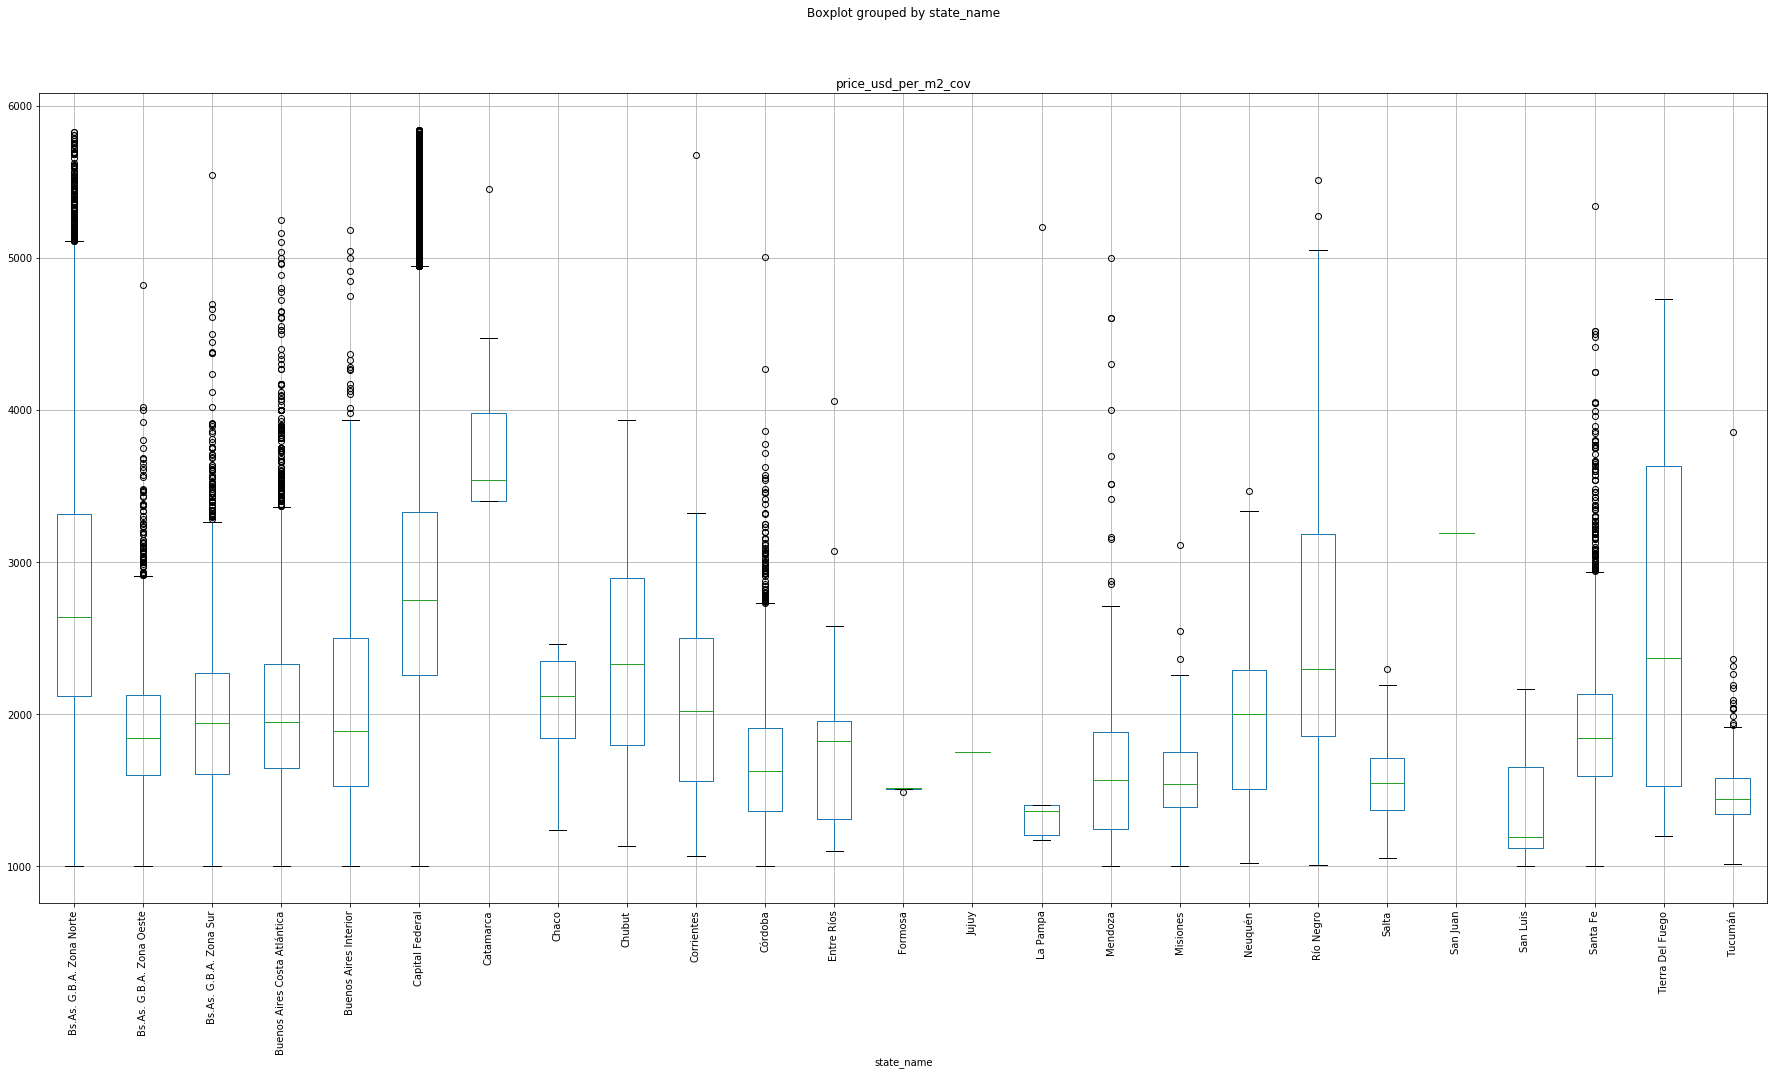

In [23]:
df_dpto.boxplot(column='price_usd_per_m2_cov', by='state_name', figsize=(30,15))
plt.xticks(rotation=90)

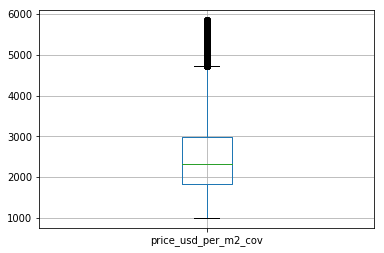

In [24]:
df_dpto.boxplot(column='price_usd_per_m2_cov')

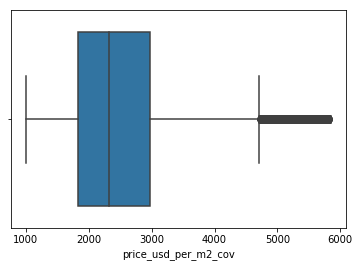

In [25]:
sns.boxplot(df_dpto['price_usd_per_m2_cov'])

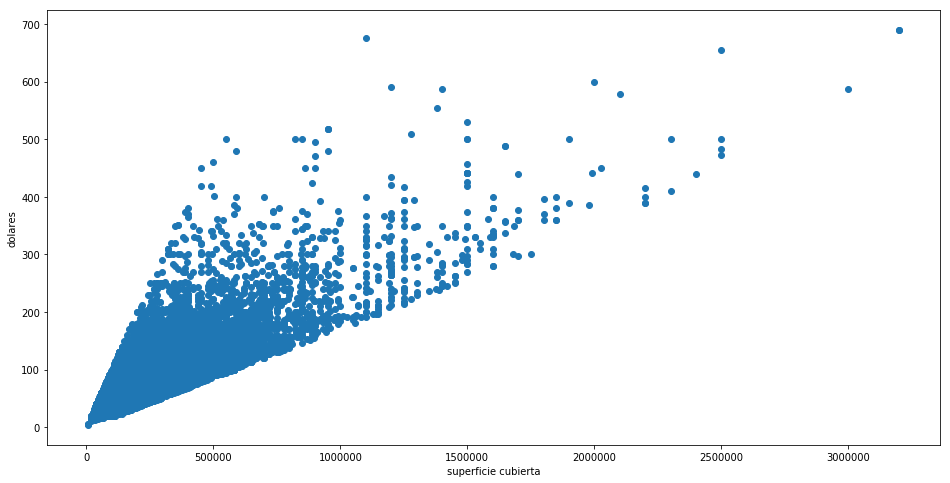

In [26]:
#scater plot
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_dpto['price_aprox_usd'], df_dpto['surface_covered_in_m2'])
ax.set_xlabel('superficie cubierta')
ax.set_ylabel('dolares')
plt.show()

## Reducción de la dimensionalidad
### Análisis de Componentes Principales (PCA)
PCA es una técnica de aprendizaje no supervisado que tiene como objetivo fundamental la reducción de dimensiones. Tiene una variedad de aplicaciones:

Reducción de la dimensionalidad

Visualización

Eliminar el ruido

Generar nuevos features en el dataset

In [27]:
# Vamos a usar el promedio de los valores por estados para una primera aproximacion y luego el total de los datos
df_tabla = df_dpto.groupby('state_name')['price_aprox_usd', 'surface_covered_in_m2', 'surface_total_in_m2','rooms',\
                                      'floor', 'expenses'].mean()

In [28]:
df_tabla.index_col = 'state_name'
df_tabla

,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2,rooms,floor,expenses
state_name,,,,,,
Bs.As. G.B.A. Zona Norte,1.954734e+05,69.147422,80.944589,2.124363,27.585462,2913.134915
Bs.As. G.B.A. Zona Oeste,9.757281e+04,51.427266,55.455485,1.986093,3.789916,1143.602649
Bs.As. G.B.A. Zona Sur,1.251931e+05,62.888151,67.850956,1.936421,4.129428,1469.507028
Buenos Aires Costa Atlántica,1.194418e+05,57.336884,64.412623,2.172785,4.434028,1682.058333
Buenos Aires Interior,1.444826e+05,67.222836,71.184162,2.446886,4.072464,886.022222
Capital Federal,2.012407e+05,68.451362,75.898075,2.253676,9.036756,6582.316820
Catamarca,1.204000e+06,331.000000,331.000000,NaN,2.000000,NaN
Chaco,1.817918e+05,93.800000,111.600000,3.250000,3.000000,2100.000000
Chubut,1.724608e+05,75.529412,85.117647,2.857143,4.000000,0.000000


In [29]:
df_tabla.dropna( inplace=True )

In [30]:
# Estoy trabajando con los state_name promedio
df_tabla.shape

(19, 6)

Necesitamos variables con media 0 y varianza 1:

In [31]:
# Observamos la media de las variables

print("Media de las variables: ")
print(df_tabla.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de las variables: ")
print(df_tabla.var(axis=0))

Media de las variables: 
price_aprox_usd          135055.819904
surface_covered_in_m2        67.280945
surface_total_in_m2          84.434228
rooms                         2.194170
floor                         6.029405
expenses                   7015.180373
dtype: float64


Varianza de las variables: 
price_aprox_usd          1.515201e+09
surface_covered_in_m2    1.878792e+02
surface_total_in_m2      2.693914e+03
rooms                    2.246487e-01
floor                    3.276603e+01
expenses                 5.412919e+08
dtype: float64


In [32]:
# Normalizamos los datos utilizando el objeto StdSclr:

from sklearn.preprocessing import StandardScaler
# Instanciamos la clase, creando el objeto StdSclr.
StdSclr = StandardScaler()

df_dpto_std = pd.DataFrame(StdSclr.fit_transform(df_tabla), index=df_tabla.index, columns=df_tabla.columns)
df_dpto_std.head()

,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2,rooms,floor,expenses
state_name,,,,,,
Bs.As. G.B.A. Zona Norte,1.594662,0.139902,-0.069076,-0.151318,3.868993,-0.181145
Bs.As. G.B.A. Zona Oeste,-0.989327,-1.188314,-0.573625,-0.451038,-0.401955,-0.259286
Bs.As. G.B.A. Zona Sur,-0.260317,-0.329262,-0.328261,-0.558710,-0.341018,-0.244895
Buenos Aires Costa Atlántica,-0.412117,-0.745358,-0.396321,-0.046356,-0.286347,-0.235508
Buenos Aires Interior,0.248812,-0.004356,-0.262281,0.547800,-0.351242,-0.270661


In [33]:
# Observamos nuevamente la media de las variables:
print("Media de las variables: ")
print(df_dpto_std.mean(axis=0))

print('\n')

# Observamos nuevamente la varianza de las variables:
print("Varianza de las variables: ")
print(df_dpto_std.var(axis=0))

Media de las variables: 
price_aprox_usd         -1.402387e-16
surface_covered_in_m2    4.820705e-17
surface_total_in_m2     -1.840633e-16
rooms                    0.000000e+00
floor                    8.764919e-17
expenses                 2.921640e-17
dtype: float64


Varianza de las variables: 
price_aprox_usd          1.055556
surface_covered_in_m2    1.055556
surface_total_in_m2      1.055556
rooms                    1.055556
floor                    1.055556
expenses                 1.055556
dtype: float64


In [34]:
from sklearn.decomposition import PCA
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Instanciamos la clase PCA:
pca_dpto = PCA()

# Al no especificar el número de componentes, PCA va a conservar todos los CP.

# Calculamos los componentes principales con el método fit()
pca_dpto.fit(df_dpto_std)
pca_dpto

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
# Imprimo los componentes principales
print(pca_dpto.components_)

[[-0.47242391 -0.58384953 -0.41684978 -0.48613888 -0.15471279 -0.04364144]
 [ 0.46055284 -0.21977807 -0.42260652 -0.04426263  0.736745   -0.12743634]
 [ 0.01449362  0.13017952 -0.09299503 -0.21722285  0.1284315   0.95420896]
 [-0.18609177  0.07270723  0.63669442 -0.58158015  0.44455027 -0.13727096]
 [ 0.63996946  0.15282994 -0.07511869 -0.58726276 -0.45199272 -0.11074435]
 [-0.34685098  0.75181599 -0.47746132 -0.17723158  0.12187591 -0.20058175]]


In [36]:
# si quisiera quedarme sólo con las primeras dos componenetes principales:
pca_dpto_2 = PCA(n_components= 2)

# Calculamos los componentes principales con el método fit()
pca_dpto_2.fit(df_dpto_std)

print(pca_dpto_2.components_)

[[-0.47242391 -0.58384953 -0.41684978 -0.48613888 -0.15471279 -0.04364144]
 [ 0.46055284 -0.21977807 -0.42260652 -0.04426263  0.736745   -0.12743634]]


In [37]:
# Veo que las componenetes principales son ortogonales, es decir que el producto interno de la matriz por
# la transpuesta da 1 en la diagonal y 0 todo el resto
print(pca_dpto.components_)
print(' ')
print(pca_dpto.components_.T)
print(' ')
print(pca_dpto.components_.T.dot(pca_dpto.components_))

[[-0.47242391 -0.58384953 -0.41684978 -0.48613888 -0.15471279 -0.04364144]
 [ 0.46055284 -0.21977807 -0.42260652 -0.04426263  0.736745   -0.12743634]
 [ 0.01449362  0.13017952 -0.09299503 -0.21722285  0.1284315   0.95420896]
 [-0.18609177  0.07270723  0.63669442 -0.58158015  0.44455027 -0.13727096]
 [ 0.63996946  0.15282994 -0.07511869 -0.58726276 -0.45199272 -0.11074435]
 [-0.34685098  0.75181599 -0.47746132 -0.17723158  0.12187591 -0.20058175]]
 
[[-0.47242391  0.46055284  0.01449362 -0.18609177  0.63996946 -0.34685098]
 [-0.58384953 -0.21977807  0.13017952  0.07270723  0.15282994  0.75181599]
 [-0.41684978 -0.42260652 -0.09299503  0.63669442 -0.07511869 -0.47746132]
 [-0.48613888 -0.04426263 -0.21722285 -0.58158015 -0.58726276 -0.17723158]
 [-0.15471279  0.736745    0.1284315   0.44455027 -0.45199272  0.12187591]
 [-0.04364144 -0.12743634  0.95420896 -0.13727096 -0.11074435 -0.20058175]]
 
[[ 1.00000000e+00  8.52110177e-17 -4.06744344e-17  3.62031531e-17
   5.81878331e-16 -7.3940676

Al observar los loadings, vemos que el PC1 está más relacionado con las variables 'surface_covered_in_m2', 'rooms', 'price_aprox_usd' y 'surface_total_in_m2')

Por otro lado, el peso de 'floor', 'surface_total_in_m2' y 'price_aprox_usd' es muy fuerte en el PC2, mientras que el peso de las demás variables es menor.

(El orden de las variables es 'price_aprox_usd', 'surface_covered_in_m2', 'surface_total_in_m2', 'rooms', 'floor', 'expenses')

La primera componenete es de tamaño (todos tienen el mismo signo).

La segunda componente es de forma (hay algunos positivos y otros negativos).

In [38]:
# Generamos un DataFrame expresando en términos de nuestros componentes principales:

df_dpto_pca = pd.DataFrame(pca_dpto.fit_transform(df_dpto_std), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6'],\
                      index=df_dpto_std.index)
df_dpto_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
state_name,,,,,,
Bs.As. G.B.A. Zona Norte,-1.323360,3.613114,0.404669,1.502269,-0.592728,0.119741
Bs.As. G.B.A. Zona Oeste,1.693064,-0.195186,-0.316750,-0.148299,-0.296386,-0.193403
Bs.As. G.B.A. Zona Sur,0.787113,-0.104105,-0.172223,0.022453,0.317111,0.106059
Buenos Aires Costa Atlántica,0.872192,-0.037401,-0.317578,-0.297844,-0.165153,-0.207645
Buenos Aires Interior,-0.205823,-0.022141,-0.394942,-0.651191,0.045299,-0.049952


In [39]:
# Observamos la media de las variables:
print("Media de los CP: ")
print(df_dpto_pca.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de los CPs: ")
print(df_dpto_pca.var(axis=0))

Media de los CP: 
PC1   -1.438907e-16
PC2    5.258951e-17
PC3   -1.314738e-16
PC4    5.770238e-17
PC5   -7.304099e-17
PC6    4.090295e-17
dtype: float64


Varianza de los CPs: 
PC1    2.728860
PC2    1.406724
PC3    1.106795
PC4    0.758976
PC5    0.282391
PC6    0.049588
dtype: float64


In [40]:
# Creamos un DataFRame con los loadings que vamos a usar para graficar

pca_loadings = pd.DataFrame(pca_dpto.components_.T, index=df_tabla.columns,\
                            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6'])
print(pca_dpto.components_)
display(pca_loadings)

[[-0.47242391 -0.58384953 -0.41684978 -0.48613888 -0.15471279 -0.04364144]
 [ 0.46055284 -0.21977807 -0.42260652 -0.04426263  0.736745   -0.12743634]
 [ 0.01449362  0.13017952 -0.09299503 -0.21722285  0.1284315   0.95420896]
 [-0.18609177  0.07270723  0.63669442 -0.58158015  0.44455027 -0.13727096]
 [ 0.63996946  0.15282994 -0.07511869 -0.58726276 -0.45199272 -0.11074435]
 [-0.34685098  0.75181599 -0.47746132 -0.17723158  0.12187591 -0.20058175]]


,PC1,PC2,PC3,PC4,PC5,PC6
price_aprox_usd,-0.472424,0.460553,0.014494,-0.186092,0.639969,-0.346851
surface_covered_in_m2,-0.583850,-0.219778,0.130180,0.072707,0.152830,0.751816
surface_total_in_m2,-0.416850,-0.422607,-0.092995,0.636694,-0.075119,-0.477461
rooms,-0.486139,-0.044263,-0.217223,-0.581580,-0.587263,-0.177232
floor,-0.154713,0.736745,0.128431,0.444550,-0.451993,0.121876
expenses,-0.043641,-0.127436,0.954209,-0.137271,-0.110744,-0.200582


# Biplot

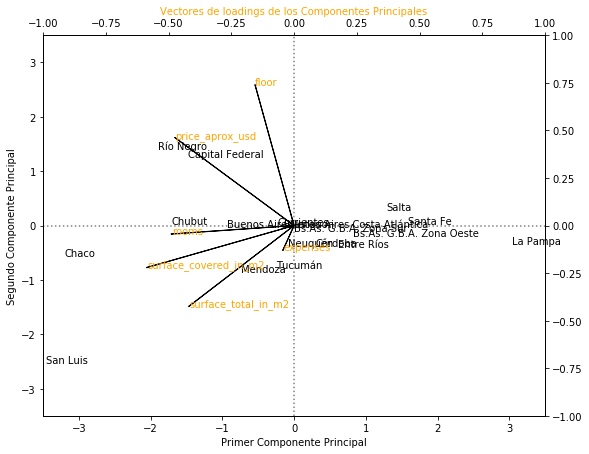

In [41]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Ploteamos a los Estados en el espacio de los Componentes Principales 1 y 2
for i in df_dpto_pca.index:
    ax1.annotate(i, (df_dpto_pca.PC1.loc[i], df_dpto_pca.PC2.loc[i]), ha='center')

# Ploteamos las líneas de referencia
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Creamos ejes secundarios
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i], pca_loadings.PC2.loc[i]), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], pca_loadings.PC2[1])
ax2.arrow(0,0,pca_loadings.PC1[2], pca_loadings.PC2[2])
ax2.arrow(0,0,pca_loadings.PC1[3], pca_loadings.PC2[3])
ax2.arrow(0,0,pca_loadings.PC1[4], pca_loadings.PC2[4])
ax2.arrow(0,0,pca_loadings.PC1[5], pca_loadings.PC2[5]);

las variables relacionadas son superficies y rooms, ya que estan muy cerca unas de otras y tambien precio y floor.

In [42]:
# Vemos la varianza explicada de cada componente principal como atributo del modelo.

pca_dpto.explained_variance_

array([2.72885952, 1.40672431, 1.1067948 , 0.75897554, 0.28239121,
       0.04958795])

In [43]:
# Vemos el ratio la varianza explicada de cada componente principal como atributo del modelo.

pca_dpto.explained_variance_ratio_

array([0.43087256, 0.22211436, 0.17475707, 0.11983824, 0.04458809,
       0.00782968])

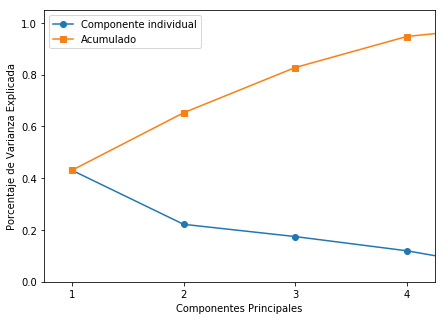

In [44]:
# Ploteamos como incrementa el % de varianza explicada a medida que agregamos componentes:

plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5,6], pca_dpto.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot([1,2,3,4,5,6], np.cumsum(pca_dpto.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

In [45]:
df_tabla.corr()

,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2,rooms,floor,expenses
price_aprox_usd,1.000000,0.584343,0.158038,0.543427,0.504246,-0.007740
surface_covered_in_m2,0.584343,1.000000,0.753625,0.656411,0.044328,0.214657
surface_total_in_m2,0.158038,0.753625,1.000000,0.319529,-0.050867,-0.030360
rooms,0.543427,0.656411,0.319529,1.000000,0.005827,-0.078501
floor,0.504246,0.044328,-0.050867,0.005827,1.000000,-0.010804
expenses,-0.007740,0.214657,-0.030360,-0.078501,-0.010804,1.000000


Text(0.5, 1.0, 'Correlacion entre features')

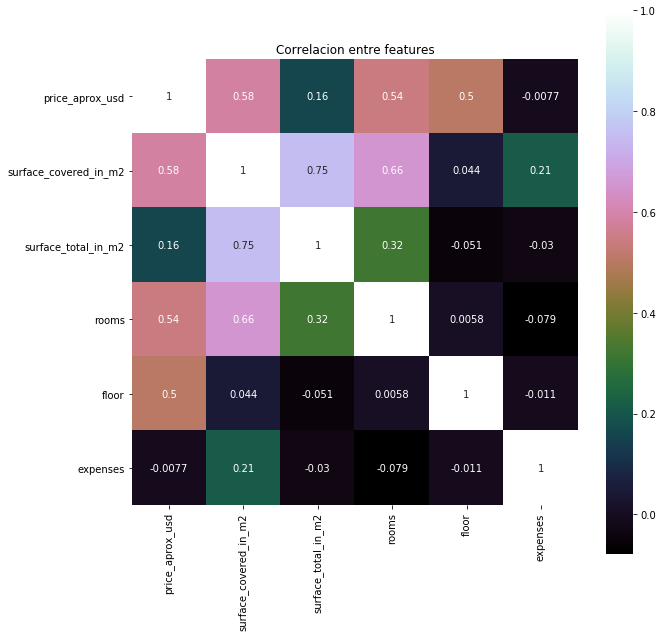

In [46]:
correlation = df_tabla.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlacion entre features')

In [47]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html
# If rowvar is True (default), then each row represents a variable, with observations in the columns. 
covarianzas = np.cov(df_dpto_std, rowvar = False)
#display(covarianzas)

#otra forma de calcular la matriz de covarianzas:
mean_vec = np.mean(df_dpto_std, axis=0)
cov_mat = (df_dpto_std - mean_vec).T.dot((df_dpto_std - mean_vec)) / (df_dpto_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)

La covarianza de las variables estandarizadas es lo mismo que la correlación

El análisis de componentes principales basado en la matriz de correlaciones es equivalente al análisis de componentes principales con las variables estandarizadas

Descomposición en autovectores y autovalores:

In [48]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.47242391  0.34685098  0.63996946 -0.46055284  0.18609177  0.01449362]
 [ 0.58384953 -0.75181599  0.15282994  0.21977807 -0.07270723  0.13017952]
 [ 0.41684978  0.47746132 -0.07511869  0.42260652 -0.63669442 -0.09299503]
 [ 0.48613888  0.17723158 -0.58726276  0.04426263  0.58158015 -0.21722285]
 [ 0.15471279 -0.12187591 -0.45199272 -0.736745   -0.44455027  0.1284315 ]
 [ 0.04364144  0.20058175 -0.11074435  0.12743634  0.13727096  0.95420896]]

Eigenvalues 
[2.72885952 0.04958795 0.28239121 1.40672431 0.75897554 1.1067948 ]


Ordeno los autovalores de mayor a menor:

In [49]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
#eig_pairs
# Sort the (eigenvalue, eigenvector) tuples from high to low
#ordeno por el primer elemento de cada tupla: el autovalor
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.7288595216201967
1.4067243083499812
1.1067948033193256
0.7589755437872527
0.28239121032291525
0.04958794593366558


Varianza explicada:

In [50]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print(tot)
print(var_exp)

6.333333333333337
[43.0872556045294, 22.211436447631268, 17.475707420831448, 11.983824375588195, 4.458808584046028, 0.7829675673736667]


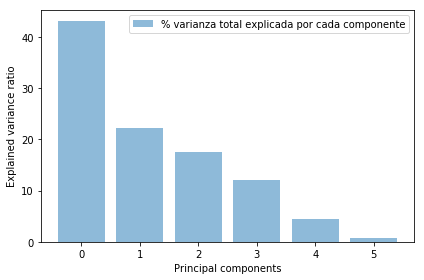

In [51]:
plt.bar(range(6), var_exp, alpha=0.5, align='center', label='% varianza total explicada por cada componente')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Me quedo con tres componentes:

In [52]:
# tengo que armar una matriz donde cada autovector sea una columna
# convierto el autovector de max autovalor (indice 0) en una columna
eig_pairs[0][1].reshape(6,1)

array([[0.47242391],
       [0.58384953],
       [0.41684978],
       [0.48613888],
       [0.15471279],
       [0.04364144]])

In [53]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1), 
                      eig_pairs[1][1].reshape(6,1),
                      eig_pairs[1][1].reshape(6,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.47242391 -0.46055284 -0.46055284]
 [ 0.58384953  0.21977807  0.21977807]
 [ 0.41684978  0.42260652  0.42260652]
 [ 0.48613888  0.04426263  0.04426263]
 [ 0.15471279 -0.736745   -0.736745  ]
 [ 0.04364144  0.12743634  0.12743634]]


Calculo las coordenadas de las observaciones en el subespacio generado por los autovecotres:

In [54]:
Y = df_dpto_std.dot(matrix_w)
Y

,0,1,2
state_name,,,
Bs.As. G.B.A. Zona Norte,1.323360,-3.613114,-3.613114
Bs.As. G.B.A. Zona Oeste,-1.693064,0.195186,0.195186
Bs.As. G.B.A. Zona Sur,-0.787113,0.104105,0.104105
Buenos Aires Costa Atlántica,-0.872192,0.037401,0.037401
Buenos Aires Interior,0.205823,0.022141,0.022141
Capital Federal,0.951436,-1.251063,-1.251063
Chaco,2.986469,0.570233,0.570233
Chubut,1.461774,-0.020602,-0.020602
Corrientes,-0.136306,-0.007212,-0.007212


Usando scikit-learn:

In [55]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(df_dpto_std)
print(Y_sklearn)

[[-1.32335954e+00  3.61311413e+00  4.04669028e-01]
 [ 1.69306422e+00 -1.95186127e-01 -3.16750064e-01]
 [ 7.87112776e-01 -1.04104529e-01 -1.72222933e-01]
 [ 8.72192488e-01 -3.74007997e-02 -3.17578012e-01]
 [-2.05822892e-01 -2.21409445e-02 -3.94942218e-01]
 [-9.51436234e-01  1.25106255e+00  7.55179514e-02]
 [-2.98646919e+00 -5.70232766e-01 -5.47461798e-01]
 [-1.46177387e+00  2.06017534e-02 -5.61015243e-01]
 [ 1.36306338e-01  7.21224792e-03  1.05099405e-02]
 [ 5.83348661e-01 -3.81751325e-01 -4.25547190e-01]
 [ 9.61426629e-01 -4.00353579e-01 -3.71677236e-01]
 [ 3.38335966e+00 -3.38230317e-01  3.34124396e-02]
 [-4.28640110e-01 -8.62359832e-01  4.22045610e+00]
 [ 2.37531760e-01 -3.70355454e-01 -4.62759649e-01]
 [-1.55545686e+00  1.39790738e+00 -1.81972972e-01]
 [ 1.46489515e+00  2.82690444e-01 -1.09054433e-03]
 [-3.16328290e+00 -2.52419519e+00 -4.79633562e-01]
 [ 1.88980212e+00  1.95798196e-02 -1.83436758e-01]
 [ 6.72018026e-02 -7.85857456e-01 -3.28477278e-01]]


## Como la practica de Machine Learning I

In [56]:
df_dpto.shape

(49944, 21)

In [57]:
# para este analisis asigno valor 0 al no cc_barrio_c
barrio_1 = df_dpto.cc_barrio_c.isnull()
df_dpto.cc_barrio_c[barrio_1] = 0

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
df_dpto_not_nulls = df_dpto.dropna()

In [59]:
df_dpto_not_nulls.shape

(1806, 21)

In [60]:
df_dpto_not_nulls.columns 

Index(['Unnamed: 0', 'property_type', 'title', 'description',
       'surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'floor',
       'price_aprox_usd', 'price_usd_per_m2_tot', 'price_usd_per_m2_cov',
       'expenses', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'ciudad', 'barrio', 'lugar', 'cc_barrio_c'],
      dtype='object')

In [61]:
columns_numeric = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor','rooms', 'expenses']
df_dpto_not_nulls_numeric = df_dpto_not_nulls[columns_numeric]
df_dpto_not_nulls_numeric.shape

(1806, 6)

In [62]:
df_dpto_not_nulls_numeric.head()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
40,54000.0,75.0,30.0,3.0,2.0,800.0
108,160000.0,80.0,80.0,2.0,2.0,1700.0
298,120000.0,88.0,82.0,11.0,4.0,1560.0
300,90000.0,65.0,62.0,1.0,3.0,1070.0
303,115000.0,70.0,65.0,2.0,3.0,2500.0


 ## Estandarizo

In [63]:
from sklearn.preprocessing import StandardScaler
# Instanciamos la clase, creando el objeto StdSclr.
StdSclr = StandardScaler()
# este objeto es el que voy a usar para escalar las observaciones nuevas, sin tener que recalcular las medias y desvios:
stdSclr_fit = StdSclr.fit(df_dpto_not_nulls_numeric)
df_dpto_std = pd.DataFrame(stdSclr_fit.transform(df_dpto_not_nulls_numeric), index=df_dpto_not_nulls_numeric.index, columns=df_dpto_not_nulls_numeric.columns)
df_dpto_std.head()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
40,-0.896342,0.035587,-0.867746,-0.509428,-0.248546,-0.038143
108,-0.040751,0.139013,0.350233,-0.809893,-0.248546,-0.035437
298,-0.363615,0.304496,0.398952,1.894299,1.518675,-0.035858
300,-0.605764,-0.171267,-0.088239,-1.110359,0.635065,-0.037331
303,-0.403974,-0.067840,-0.015161,-0.809893,0.635065,-0.033031


In [64]:
stdSclr_fit.transform(df_dpto_not_nulls_numeric)

array([[-0.89634165,  0.03558655, -0.86774561, -0.50942756, -0.24854609,
        -0.03814282],
       [-0.0407511 ,  0.13901316,  0.35023289, -0.80989332, -0.24854609,
        -0.03543671],
       [-0.36361546,  0.30449575,  0.39895203,  1.89429855,  1.51867533,
        -0.03585766],
       ...,
       [-0.64208597, -0.75045575, -0.77030733, -0.80989332, -1.1321568 ,
        -0.03694011],
       [ 0.42740222,  0.22175446,  0.37459246,  0.99290126,  0.63506462,
        -0.02536395],
       [ 0.42740222,  0.22175446,  0.37459246,  0.99290126,  0.63506462,
        -0.02536395]])

## PCA

In [65]:
from sklearn.decomposition import PCA

# Instanciamos la clase PCA:
pca_properatti = PCA()

# Al no especificar el número de componentes, PCA va a conservar todos los CP.

# Calculamos los componentes principales con el método fit()
pca_properatti_fit = pca_properatti.fit(df_dpto_std)


## Contribuciones de cada componenete principal a la varianza total

In [66]:
pca_properatti_fit.explained_variance_ratio_

array([0.55435632, 0.17357422, 0.16398153, 0.07158872, 0.02968445,
       0.00681476])

Ver que pca_properatti_fit.transform(df_dpto_std) es lo mismo que pca_properatti.fit_transform(df_dpto_std)

Uso pca_properatti_fit.transform(df_dpto_std) porque ya tengo creado el objeto pca_properatti_fit

In [67]:
df_dpto_pca = pd.DataFrame(pca_properatti_fit.transform(df_dpto_std), 
                      columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=df_dpto_std.index)
df_dpto_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
40,-1.000642,-0.511178,0.264102,-0.215808,0.347821,0.616875
108,0.116039,-0.687153,0.382644,0.398070,0.203718,-0.174886
298,0.903180,1.339963,-0.866816,-1.656640,0.412377,-0.054843
300,-0.167915,-1.077261,0.630307,-0.671651,0.053056,-0.041967
303,0.029049,-0.803782,0.466268,-0.602806,0.016773,-0.019512


In [68]:
pca_loadings = pd.DataFrame(pca_properatti.components_.T, index=df_dpto_std.columns,\
                            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
# print(pca_properatti.components_)
display(pca_loadings)

,PC1,PC2,PC3,PC4,PC5,PC6
price_aprox_usd,0.489427,0.129842,-0.070683,0.443948,-0.734306,0.048072
surface_total_in_m2,0.527026,-0.026476,0.013813,0.176119,0.495405,0.667014
surface_covered_in_m2,0.532247,-0.029449,0.015833,0.136968,0.382246,-0.742107
floor,0.016059,0.831684,-0.519225,-0.163034,0.108743,-0.006642
rooms,0.446229,-0.098435,0.073054,-0.852364,-0.239405,0.044873
expenses,-0.006334,0.529325,0.848310,0.005182,0.010790,-0.000935


## Biplot

In [69]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Verdana',
        'size'   : 22}

matplotlib.rc('font', **font)

def plot_biplot(df_dpto_pca, pca_loadings):
    
    fig , ax1 = plt.subplots(figsize=(30,30))
    
    ax1.set_xlim(-5,15)
    ax1.set_ylim(-5,10)

    # Ploteamos a las propiedades en el espacio de los Componentes Principales 1 y 2
    for i in df_dpto_pca.index:
        # si viene un color lo uso, sino uso azul: 
        # (uso all porque estoy pidiendo que el array tenga todos los valores no nulos, sirve tambien any)
        if df_dpto_pca.color.loc[i].all():
            label = str(i) + "-" + df_dpto_pca.places.loc[i]
            ax1.annotate(label, (df_dpto_pca.PC1.loc[i], df_dpto_pca.PC2.loc[i]), ha='center',\
                         color=df_dpto_pca.color.loc[i]).set_fontsize(22)
        else:
            ax1.annotate(i, (df_dpto_pca.PC1.loc[i], df_dpto_pca.PC2.loc[i]), ha='center', color='blue').set_fontsize(22)

    # Ploteamos las líneas de referencia
    ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
    ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

    ax1.set_xlabel('Primer Componente Principal')
    ax1.set_ylabel('Segundo Componente Principal')

    # Creamos ejes secundarios
    ax2 = ax1.twinx().twiny() 

    ax2.set_xlim(-5,15)
    ax2.set_ylim(-5,10)
    ax2.tick_params(axis='y', colors='orange')
    ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

    view_scale_factor = 15
    
    # Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
    for i in pca_loadings[['PC1', 'PC2']].index:
        ax2.annotate(i, (view_scale_factor * pca_loadings.PC1.loc[i], view_scale_factor * pca_loadings.PC2.loc[i]),\
                     color='orange')

    # Plot vectors
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[0], view_scale_factor*pca_loadings.PC2[0], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[1], view_scale_factor*pca_loadings.PC2[1], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[2], view_scale_factor*pca_loadings.PC2[2], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[3], view_scale_factor*pca_loadings.PC2[3], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[4], view_scale_factor*pca_loadings.PC2[4], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[5], view_scale_factor*pca_loadings.PC2[5], transform = ax2.transData)

## Armo la paleta de colores

In [70]:
# construyo un diccionario que mapea place name con un color
df_dpto_state_name = df_dpto.state_name[df_dpto_std.index]
state_name_unique = df_dpto_state_name.unique()
# pido un color para cada state_name distinto
#state_name_color = plt.cm.Set1(range(len(state_name_unique)))
#state_name_color = plt.cm.Set3(range(len(state_name_unique)))
#state_name_color = plt.cm.Pastel1(range(len(state_name_unique)))
#state_name_color = plt.cm.Dark2(range(len(state_name_unique)))
#state_name_color = plt.cm.tab10(range(len(state_name_unique)))
state_name_color = plt.cm.tab20c(range(len(state_name_unique)))

#asocio state_name con color
color_for_state_name = dict(zip(state_name_unique, state_name_color))
color_for_state_name

# dada una fila de df_dpto_pca devuelve el color con que hay que representarla en el espacio de componentes principales
def get_color(row, df_dpto, color_for_state_name):
    #print(row.name)
    state_name = df_dpto.loc[row.name, "state_name"]
    result = color_for_state_name[state_name]
    return result
    
# agrego a df_dpto_pca el el color que le corresponde al state_name:
colors = df_dpto_pca.apply(lambda x: get_color(x, df_dpto, color_for_state_name) , axis=1)
#print(colors)
df_dpto_pca['color'] = colors


# agrego state_name a df_dpto_pca
# x.name es el indice del registro en el dataframe original
places = df_dpto_pca.apply(lambda x: df_dpto_not_nulls.loc[x.name, "state_name"], axis = 1)
df_dpto_pca['places'] = places

In [71]:
df_dpto_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,color,places
40,-1.000642,-0.511178,0.264102,-0.215808,0.347821,0.616875,"[0.19215686274509805, 0.5098039215686274, 0.74...",Buenos Aires Costa Atlántica
108,0.116039,-0.687153,0.382644,0.398070,0.203718,-0.174886,"[0.4196078431372549, 0.6823529411764706, 0.839...",Bs.As. G.B.A. Zona Oeste
298,0.903180,1.339963,-0.866816,-1.656640,0.412377,-0.054843,"[0.4196078431372549, 0.6823529411764706, 0.839...",Bs.As. G.B.A. Zona Oeste
300,-0.167915,-1.077261,0.630307,-0.671651,0.053056,-0.041967,"[0.4196078431372549, 0.6823529411764706, 0.839...",Bs.As. G.B.A. Zona Oeste
303,0.029049,-0.803782,0.466268,-0.602806,0.016773,-0.019512,"[0.6196078431372549, 0.792156862745098, 0.8823...",Capital Federal


## Agrego las referencias de color

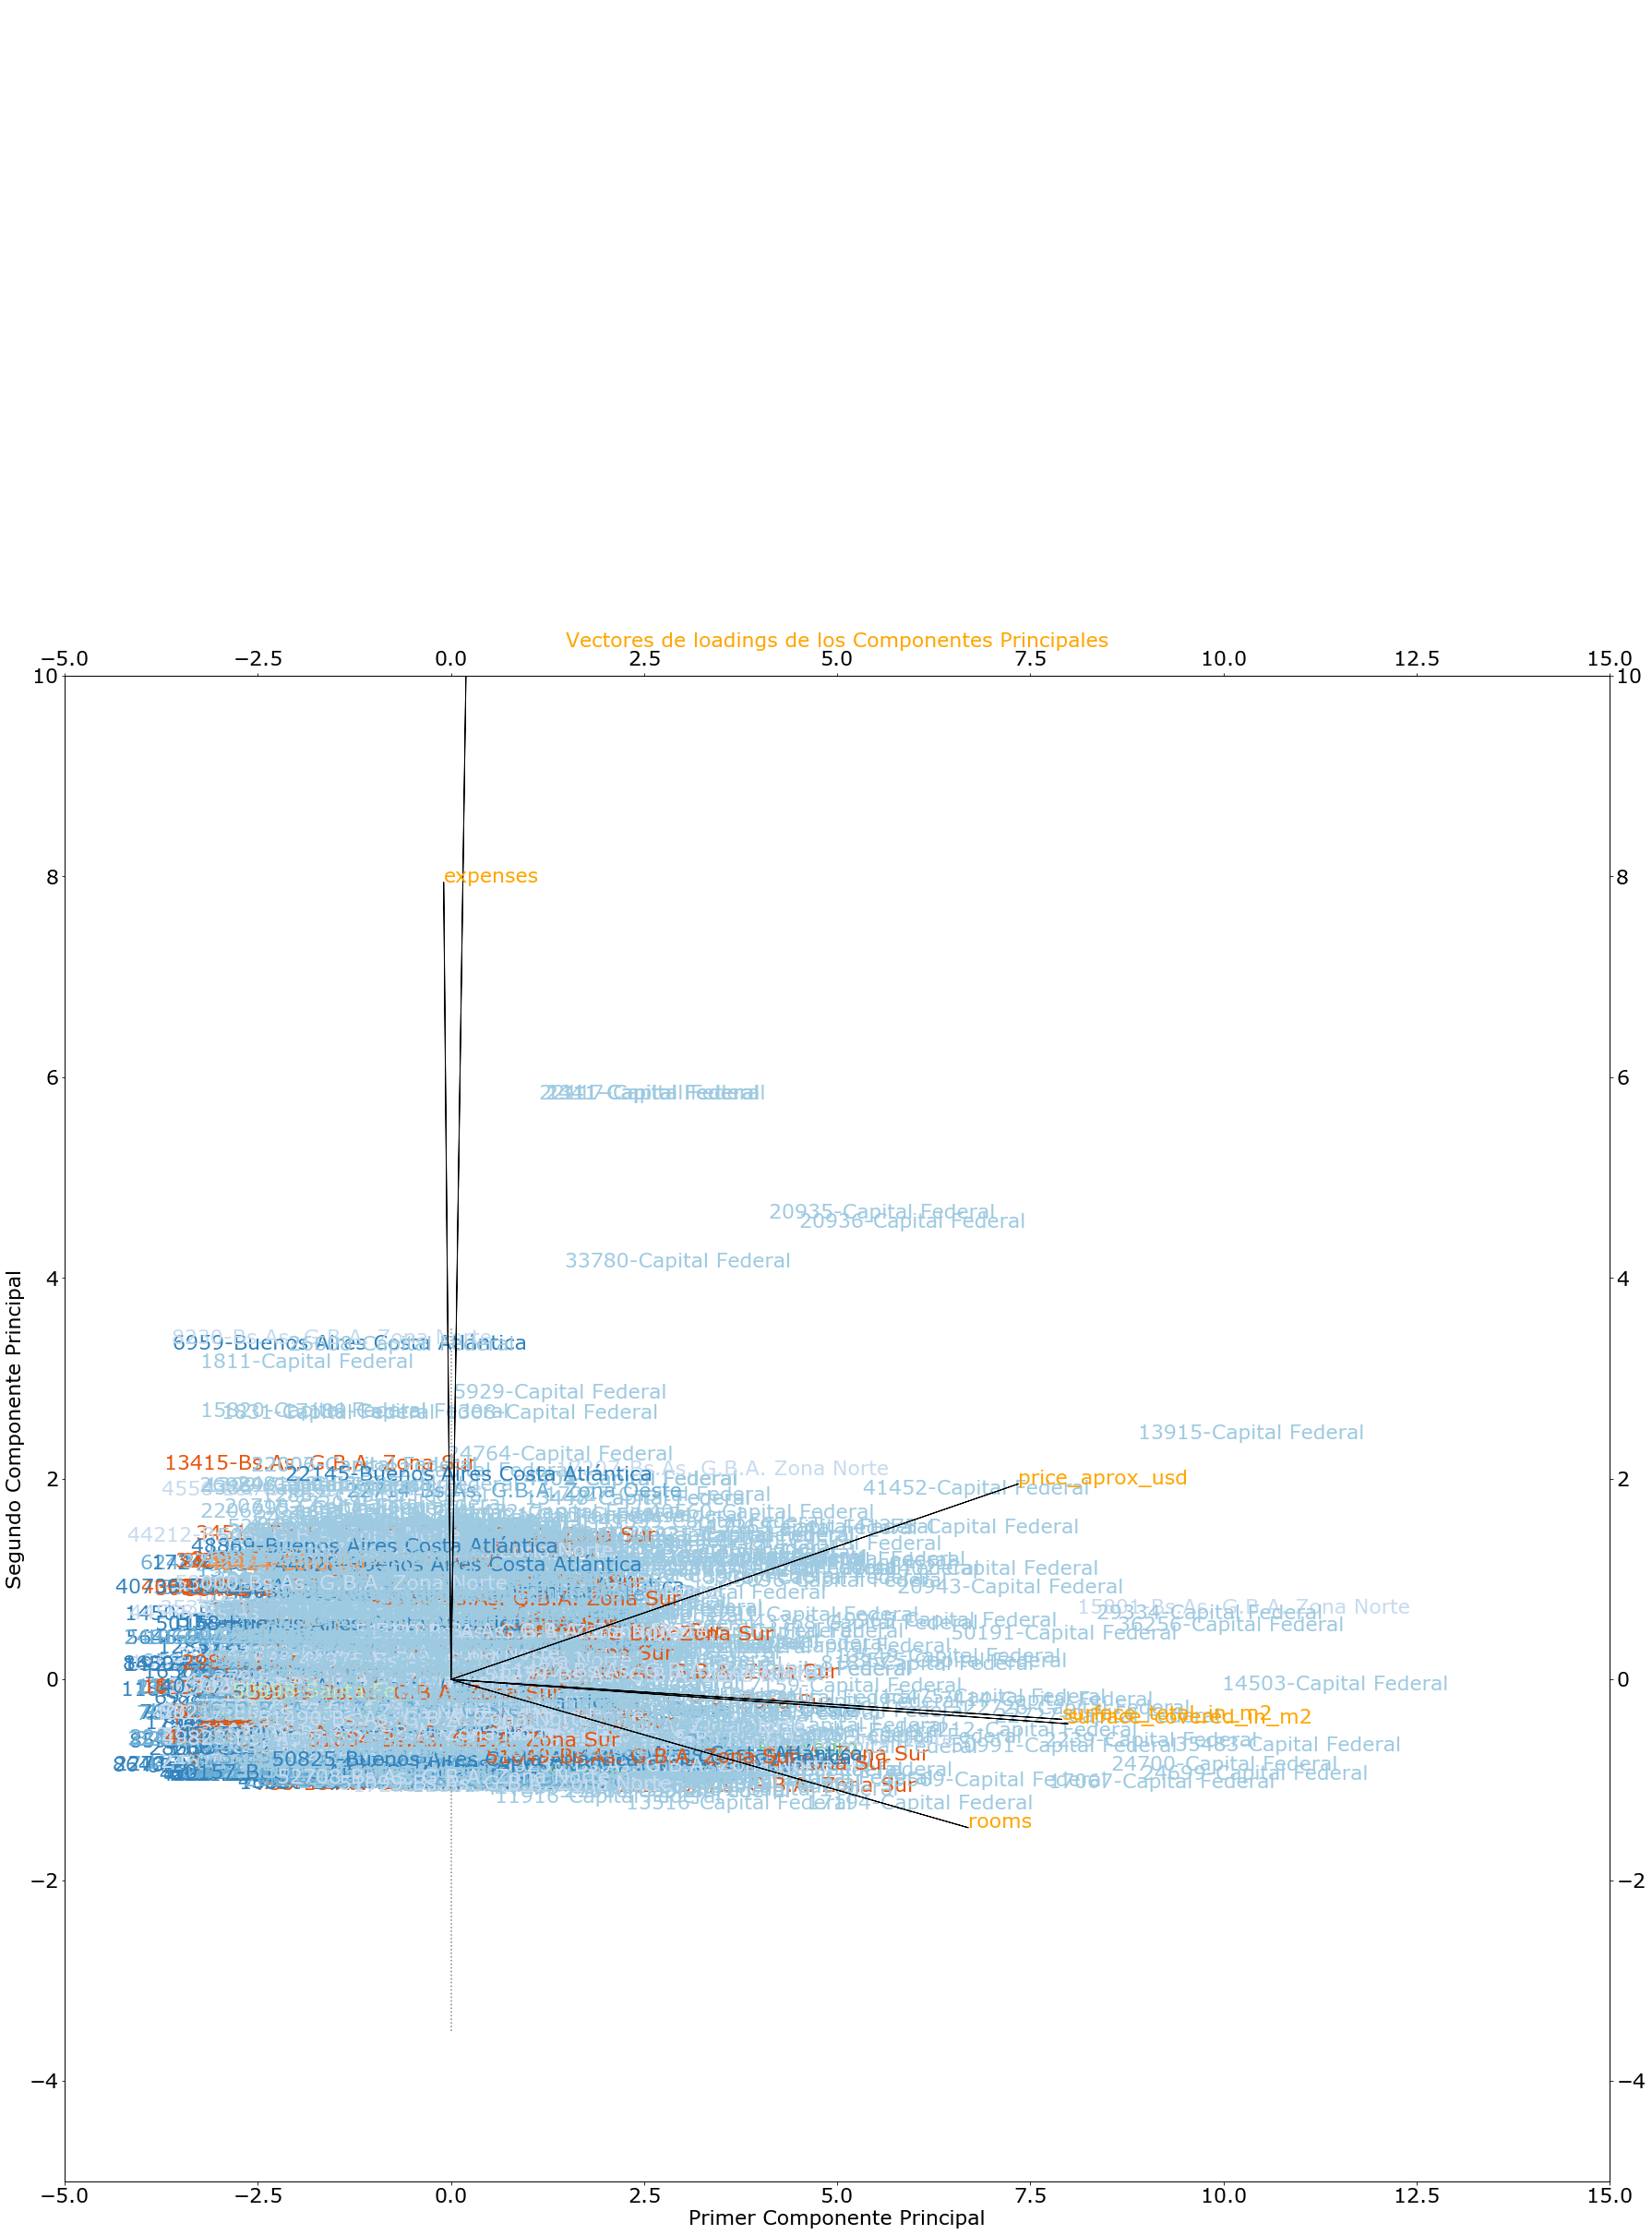

In [72]:
# df_dpto_pca tiene las coordenadas de cada registro en el espacio de las componentes principales
# pca_loadings tiene las coordenadas de cada variable original en el espacio de las componentes principales

plot_biplot(df_dpto_pca, pca_loadings)

## Miro algunos casos individuales

In [73]:
df_dpto.loc[13915]

Unnamed: 0                                                           32295
property_type                                                    apartment
title                                                DEPARTAMENTO EN VENTA
description              Departamento 5 AMBIENTES en Belgrano, Capital ...
surface_total_in_m2                                                    295
surface_covered_in_m2                                                  280
rooms                                                                    5
floor                                                                   12
price_aprox_usd                                                   1.19e+06
price_usd_per_m2_tot                                                4033.9
price_usd_per_m2_cov                                                  4250
expenses                                                             16000
state_name                                                 Capital Federal
geonames_id              

In [74]:
df_dpto.loc[22417]

Unnamed: 0                                                           50652
property_type                                                    apartment
title                    BOTANICAL- MALABIA 2233- PALERMO SOHO3 AMBIENT...
description              CODIGO: 2 ubicado en: Malabia 2233 -  Publicad...
surface_total_in_m2                                                    129
surface_covered_in_m2                                                  103
rooms                                                                    2
floor                                                                  NaN
price_aprox_usd                                                     444712
price_usd_per_m2_tot                                               3447.38
price_usd_per_m2_cov                                               4317.59
expenses                                                               NaN
state_name                                                 Capital Federal
geonames_id              

## Dada una observacion nueva (en el subespacio de las variables originales), cómo conozco las coordenadas en el subespacio de las componenetes principales?

In [75]:
obs_nueva = df_dpto_not_nulls_numeric.loc[13915].copy()
obs_nueva
# tengo que convertirla en un numpy.ndarray de 1 fila:
obs_nueva_fila = obs_nueva.values.reshape(1, -1)
# estandarizo la nueva observacion con el objeto fit creado con todo el df_dpto numerico original
obs_nueva_fila_std = stdSclr_fit.transform(obs_nueva_fila)
print(obs_nueva_fila)
print(obs_nueva_fila_std)

# entonces las coordenadas de la nueva observacion en el subespacio de las componentes principales es:
# pca_properatti_fit también se calculo al inicio y ahora se reusa para transformar (sin recalcularlo): 
pca_properatti_fit.transform(obs_nueva_fila_std)

[[1.19e+06 2.95e+02 2.80e+02 1.20e+01 5.00e+00 1.60e+04]]
[[8.27300610e+00 4.58635774e+00 5.22214690e+00 2.19476431e+00
  2.40228604e+00 7.56046146e-03]]


array([[10.35280148,  2.39185652, -1.39639419,  2.79039753, -2.14303731,
        -0.3253171 ]])

In [76]:
df_dpto.to_csv('prop_apartament_1.csv')

df_dpto_regr = pd.read_csv("prop_apartament_1.csv", usecols=[6,7,8,9,12])

df_dpto.shape

(49944, 21)

In [77]:
df_dpto_not_nulls = df_dpto_regr.dropna()
df_dpto_not_nulls.columns

Index(['surface_covered_in_m2', 'rooms', 'floor', 'price_aprox_usd',
       'expenses'],
      dtype='object')

In [78]:
# Genero un nuevo dataframe para ser usado estandarizado en otras regreciones o con campos completos
df_dpto_std.to_csv('prop_apartament_std.csv')
df_dpto_not_nulls.to_csv('prop_apartament_not_nulls.csv')